# Installing required Libraries 

In [ ]:
!pip3 install sympy
!pip3 install numpy
!pip3 install matplotlib

# Importing Libraries 

In [3]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import math as m

# Define function
This part is where we define the fuctions and get the gradiant and initial point 

In [5]:
# define the variables
x1, x2, x3 = sp.symbols('x1 x2 x3')
#define the functions
g1 = 3*x1 - sp.cos(x2*x3) - 1/2
g2 = x1**2 - 81*(x2 + 0.1)**2 + sp.sin(x3) + 1.06
g3 = sp.exp(-x1*x2) + 20*x3 + (10*m.pi - 3)/3

# define the whole function
f = 0.5*(g1**2) + 0.5*(g2**2) + 0.5*(g3**2)

# define the gradiand of the function
grad_f = sp.Matrix([sp.diff(f, x1), sp.diff(f, x2), sp.diff(f, x3)])

# define the hessian of the function
hess_f = sp.Matrix([[sp.diff(grad_f[0], x1), sp.diff(grad_f[0], x2), sp.diff(grad_f[0], x3)],
                    [sp.diff(grad_f[1], x1), sp.diff(grad_f[1], x2), sp.diff(grad_f[1], x3)],
                    [sp.diff(grad_f[2], x1), sp.diff(grad_f[2], x2), sp.diff(grad_f[2], x3)]])



# Get the Local minimum 

## Gradiant decent Part 

Iteration = 0  x = [0.38018993 0.23550036 0.41241052]  f(x) = 201.901340867194
Iteration = 1  x = [0.3812688  0.19532085 0.37583047]  f(x) = 175.649498012713
Iteration = 2  x = [0.38211848 0.16968131 0.3405082 ]  f(x) = 157.780644453449
Iteration = 3  x = [0.38283042 0.15128992 0.30647994]  f(x) = 143.438728664312
Iteration = 4  x = [0.38344793 0.13720603 0.27373344]  f(x) = 131.136590130138
Iteration = 5  x = [0.38399575 0.12594809 0.24223939]  f(x) = 120.252456191587
Iteration = 6  x = [0.38448968 0.11666824 0.21196137]  f(x) = 110.467864549246
Iteration = 7  x = [0.38494052 0.10883851 0.18285989]  f(x) = 101.592911319087
Iteration = 8  x = [0.38535601 0.10210964 0.15489438]  f(x) = 93.5001887955117
Iteration = 9  x = [0.38574197 0.09623969 0.12802414]  f(x) = 86.0961864152880
Iteration = 10  x = [0.38610283 0.09105499 0.10220898]  f(x) = 79.3075742556157
Iteration = 11  x = [0.38644213 0.08642715 0.07740948]  f(x) = 73.0740578860282
Iteration = 12  x = [0.38676266 0.08225896 0.05358

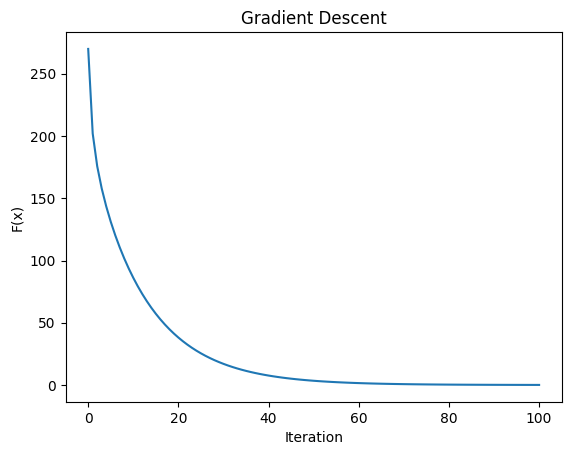

In [24]:
# define the initial point
xold = np.random.rand(3)
xnew = np.empty(3)
# define the tolerance
tol = 1e-6
# define the maximum number of iterations
max_iter = 100
# define the learning rate
miu= 0.0001
# define the list to store the value of the function for every iteration
y=[] 
y.append(f.evalf(subs={x1:xold[0], x2:xold[1], x3:xold[2]}))

for i in range(max_iter):
    xnew = xold - miu*sp.matrix2numpy(grad_f.subs({x1:xold[0], x2:xold[1], x3:xold[2]})).reshape(3).astype(float)
    y.append(f.evalf(subs={x1:xnew[0], x2:xnew[1], x3:xnew[2]}))
    if np.linalg.norm(xnew-xold) < tol:
        print('The algorithm converged after :', i, 'iterations')
        print('The minimum is :', xnew)
        break
    print('Iteration =', i, ' x =', xnew, ' f(x) =', f.evalf(subs={x1:xnew[0], x2:xnew[1], x3:xnew[2]}))
    xold = xnew

# plot the function value for every iteration
plt.plot(y)
plt.ylabel('F(x)')
plt.xlabel('Iteration')
plt.title('Gradient Descent')
plt.show()

## Newton Raphsons method

Iteration = 0  x = [ 5.03445336e-01 -1.06597500e-05 -5.23570522e-01]  f(x) = 6.02563632586851e-5
Iteration = 1  x = [ 5.00002824e-01 -5.42066952e-07 -5.23598787e-01]  f(x) = 1.03115592279852e-10
Iteration = 2  x = [ 5.00000000e-01  5.75733408e-12 -5.23598776e-01]  f(x) = 4.02183131020846e-21
The algorithm converged after : 3 iterations
The minimum is : [ 5.00000000e-01 -2.91976088e-17 -5.23598776e-01]


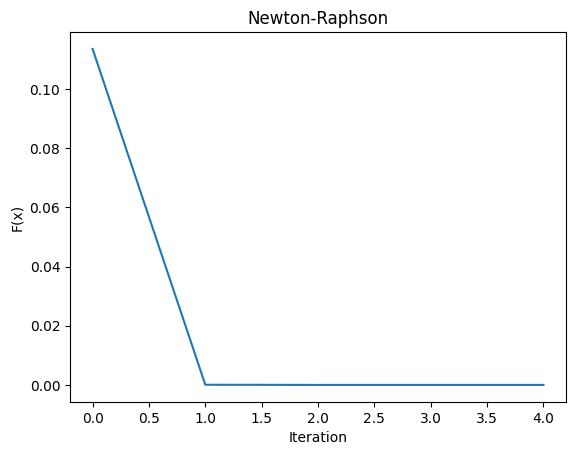

In [25]:
# define the initial point
xold_NR = xold
xnew_NR = np.empty(3)
# define the tolerance
tol = 1e-6
# define the maximum number of iterations
max_iter = 100
# define the list to store the value of the function for every iteration
y_NR=[] 
y_NR.append(f.evalf(subs={x1:xold_NR[0], x2:xold_NR[1], x3:xold_NR[2]}))

for i in range(max_iter):
    xnew_NR = xold_NR - np.linalg.inv(sp.matrix2numpy(hess_f.subs({x1:xold_NR[0], x2:xold_NR[1], x3:xold_NR[2]})).reshape(3,3).astype(float))@sp.matrix2numpy(grad_f.subs({x1:xold_NR[0], x2:xold_NR[1], x3:xold_NR[2]})).reshape(3).astype(float)
    y_NR.append(f.evalf(subs={x1:xnew_NR[0], x2:xnew_NR[1], x3:xnew_NR[2]}))
    if np.linalg.norm(xnew_NR-xold_NR) < tol:
        print('The algorithm converged after :', i, 'iterations')
        print('The minimum is :', xnew_NR)
        break
    print('Iteration =', i, ' x =', xnew_NR, ' f(x) =', f.evalf(subs={x1:xnew_NR[0], x2:xnew_NR[1], x3:xnew_NR[2]}))
    xold_NR = xnew_NR

# plot the function value for every iteration
plt.plot(y_NR)
plt.ylabel('F(x)')
plt.xlabel('Iteration')
plt.title('Newton-Raphson')
plt.show()


## Steepest Algorithim 

Iteration = 0  x = [ 0.40211659 -0.00216029 -0.52452285]  f(x) = 0.0447543686471418
Iteration = 1  x = [ 0.40778297 -0.00749596 -0.52207564]  f(x) = 0.0394225013449408
Iteration = 2  x = [ 0.41195652 -0.00473633 -0.52572244]  f(x) = 0.0357286261250730
Iteration = 3  x = [ 0.41565059 -0.00533065 -0.52194452]  f(x) = 0.0326729411231584
Iteration = 4  x = [ 0.41948168 -0.00461281 -0.52557766]  f(x) = 0.0298858661963347
Iteration = 5  x = [ 0.42284364 -0.00488342 -0.52208599]  f(x) = 0.0273371489760997
Iteration = 6  x = [ 0.42634817 -0.00424333 -0.52541072]  f(x) = 0.0250059193014260
Iteration = 7  x = [ 0.42942274 -0.00449263 -0.52221788]  f(x) = 0.0228739172208894
Iteration = 8  x = [ 0.43262728 -0.00389767 -0.52525726]  f(x) = 0.0209237921357082
Iteration = 9  x = [ 0.43543936 -0.00413134 -0.52233811]  f(x) = 0.0191402639605067
Iteration = 10  x = [ 0.4383697  -0.0035786  -0.52511672]  f(x) = 0.0175088403467894
Iteration = 11  x = [ 0.4409418  -0.00379734 -0.52244768]  f(x) = 0.0160167

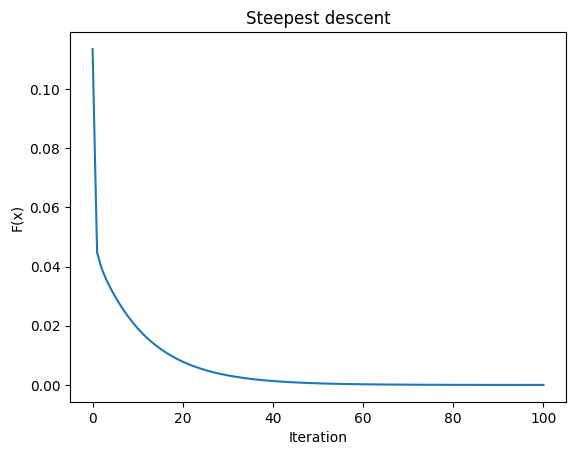

In [26]:
import scipy.optimize as opt
import warnings
warnings.filterwarnings("ignore")
# define the initial point
xold_SA = xold
xnew_SA = np.empty(3)
#define the symbol of mu
miu = sp.symbols('miu')
# define the tolerance
tol = 1e-6
# define the maximum number of iterations
max_iter = 100
# define the list to store the value of the function for every iteration
y_SA=[] 
y_SA.append(f.evalf(subs={x1:xold_SA[0], x2:xold_SA[1], x3:xold_SA[2]}))
# define the learning rate
miu_old= 0.0004
miu_new= 0.001
# define the list to store the value of the learning rate for every iteration
miu_SA=[]

for i in range(max_iter):
    
    X_with_miu = xold_SA.reshape(3,1) - miu*grad_f.evalf(subs={x1:xold_SA[0], x2:xold_SA[1], x3:xold_SA[2]}) # get new x function with miu
    phi=f.evalf(subs={x1:X_with_miu[0], x2:X_with_miu[1], x3:X_with_miu[2]}) # define the function phi
    phi=sp.lambdify(miu, phi, 'scipy') # convert the mathimatical function to a lambda function
    pp=opt.minimize_scalar(phi , method='Brent') # Brent method is used to find the minimum of the function
    miu_new=pp.x
    xnew_SA = xold_SA.reshape(3) - miu_new*sp.matrix2numpy(grad_f.subs({x1:xold_SA[0], x2:xold_SA[1], x3:xold_SA[2]})).reshape(3).astype(float)
    y_SA.append(f.evalf(subs={x1:xnew_SA[0], x2:xnew_SA[1], x3:xnew_SA[2]}))
    miu_SA.append(miu_new)
    if np.linalg.norm(xnew_SA-xold_SA) < tol:
        print('The algorithm converged after :', i, 'iterations')
        print('The minimum is :', xnew_SA)
        break
    print('Iteration =', i, ' x =', xnew_SA, ' f(x) =', f.evalf(subs={x1:xnew_SA[0], x2:xnew_SA[1], x3:xnew_SA[2]}))
    xold_SA = xnew_SA
# plot the function value for every iteration
plt.plot(y_SA)
plt.ylabel('F(x)')
plt.xlabel('Iteration')
plt.title('Steepest descent')
plt.show()
    

# Preformance Comparison 

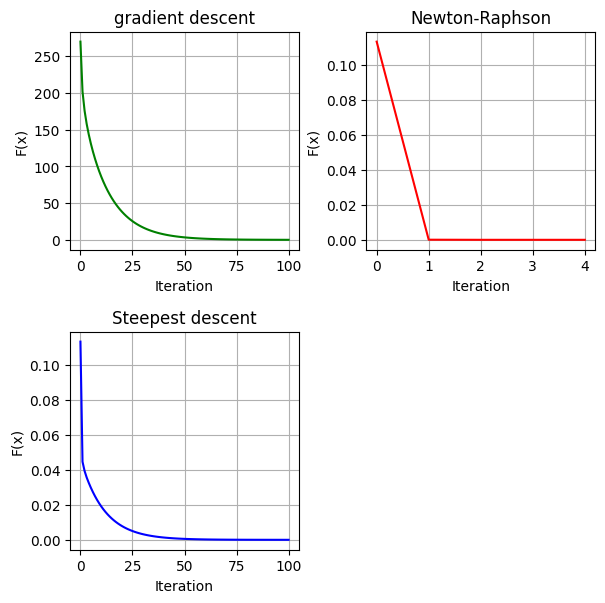

In [27]:
figure, axis = plt.subplots(2, 2)
  
# For gradiant decent Function
axis[0, 0].plot(y, color='green')
axis[0, 0].grid(True)
axis[0, 0].set_title("gradient descent")
axis[0, 0].set_xlabel("Iteration")
axis[0, 0].set_ylabel("F(x)")
  
# For newton raphson Function
axis[0, 1].plot(y_NR, color='red')
axis[0, 1].grid(True)
axis[0, 1].set_title("Newton-Raphson")
axis[0, 1].set_xlabel("Iteration")
axis[0, 1].set_ylabel("F(x)")
  
# For Tangent Function
axis[1, 0].plot(y_SA, color='blue')
axis[1, 0].grid(True)
axis[1, 0].set_title("Steepest descent")
axis[1, 0].set_xlabel("Iteration")
axis[1, 0].set_ylabel("F(x)")
figure.tight_layout(pad=0.0)
figure.set_size_inches(6, 6)
figure.delaxes(axis[1,1])
plt.show()